# Project Name - Cars Regression model analysis

# Introduction
Cars data is given in csv format. First it need to be cleaned and make a desirable data frame by those attribute on which 'Horsepower' is depand. 
And fit a line between 'Enginesize' and 'Horsepoer' is case of simple linear regression. In this project train-test split  evalution matrics is used for model evalution.
Finall we need to predict our model and check for errors.
If depandant parameters are more than one then use multi linear regression model.


data_set = (link: https://drive.google.com/file/d/1MlrQh-fKcL75ni_swveeiRPW_Vn9Q3xw/view)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.listdir('data')

['.ipynb_checkpoints',
 '1. Weather Data.csv',
 '2. Cars Data1.csv',
 'bpi.csv',
 'chart.jpg',
 'climate_res.txt',
 'covid_impact_on_airport_traffic.csv',
 'Data1',
 'data1,loans2.txt',
 'data1,loans3.txt',
 'emis1.txt',
 'gal.jpg',
 'kaggle.json',
 'loans1.txt',
 'loans2.txt',
 'loans3.txt',
 'my_climate.txt']

In [4]:
cars_df=pd.read_csv('./data/2. Cars Data1.csv')

In [5]:
cars_df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [9]:
main_df=cars_df[['EngineSize','Cylinders','Horsepower']]

In [10]:
main_df

,EngineSize,Cylinders,Horsepower
0,3.5,6.0,265.0
1,2.0,4.0,200.0
2,2.4,4.0,200.0
3,3.2,6.0,270.0
4,3.5,6.0,225.0
...,...,...,...
427,2.4,5.0,197.0
428,2.3,5.0,242.0
429,2.9,6.0,268.0
430,1.9,4.0,170.0


### Data cleaning
*Here i would linke to drop all nunll values in cylinders and filled all nulls in other columns by liner interpolation* 

In [28]:
main_df.head(2)

,EngineSize,Cylinders,Horsepower
0,3.5,6.0,265.0
1,2.0,4.0,200.0


In [30]:
main_df.isna().sum()

EngineSize    4
Cylinders     6
Horsepower    4
dtype: int64

In [31]:
bool_series=pd.notna(main_df['Cylinders'])

In [43]:
main_df=main_df[bool_series]

In [44]:
main_df.isna().sum()

EngineSize    0
Cylinders     0
Horsepower    0
dtype: int64

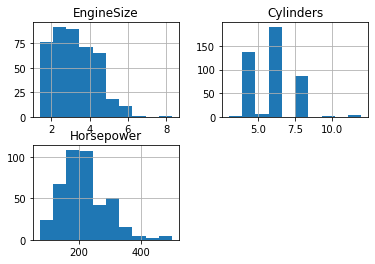

In [45]:
main_df.hist();

### Now check weather the plot between independent and dependent variable is linear

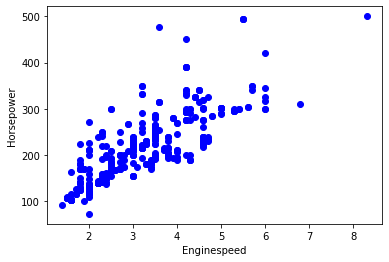

In [46]:
plt.scatter(main_df.EngineSize,main_df.Horsepower, color='blue')
plt.ylabel('Horsepower')
plt.xlabel('Enginespeed');

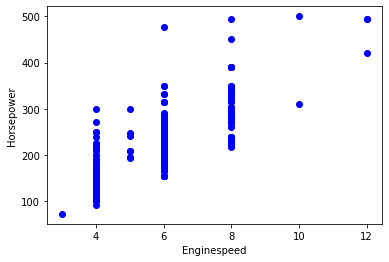

In [47]:
plt.scatter(main_df.Cylinders,main_df.Horsepower, color='blue')
plt.ylabel('Horsepower')
plt.xlabel('Enginespeed');

### Now create train test data sets, Here i am taking train-test split data sets

In [48]:
main_df.head(2)

,EngineSize,Cylinders,Horsepower
0,3.5,6.0,265.0
1,2.0,4.0,200.0


In [49]:
main_df.shape

(426, 3)

In [74]:
ms=np.random.rand(len(main_df)) < 0.8 # This contains a boolean series

In [66]:
ms.shape

(426,)

In [75]:
train_df=main_df[ms]

In [76]:
train_df.head()

,EngineSize,Cylinders,Horsepower
0,3.5,6.0,265.0
1,2.0,4.0,200.0
3,3.2,6.0,270.0
4,3.5,6.0,225.0
5,3.5,6.0,225.0


In [77]:
test_df=main_df[~ms]

In [78]:
test_df.head(5)

,EngineSize,Cylinders,Horsepower
2,2.4,4.0,200.0
14,3.0,6.0,220.0
18,4.2,8.0,330.0
20,4.2,8.0,450.0
23,3.2,6.0,250.0


### Train data distribution

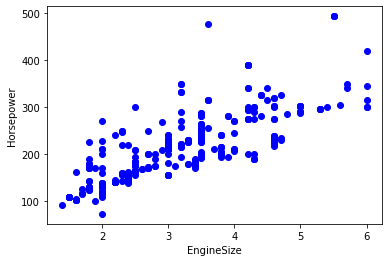

In [81]:
plt.scatter(train_df.EngineSize,train_df.Horsepower,color='blue')
plt.xlabel('EngineSize')
plt.ylabel('Horsepower');

### Modelling using linear regression

In [86]:
from sklearn import linear_model

In [102]:
regr=linear_model.LinearRegression()

In [109]:
train_x=np.asanyarray(train_df[['EngineSize']])
train_y=np.asanyarray(train_df[['Horsepower']])

In [110]:
regr.fit (train_x,train_y)
print('coefficients:', regr.coef_)
print('Intercept:',regr.intercept_)

coefficients: [[53.68936775]]
Intercept: [44.26608901]


### Plot the output and fit the line
*line= (train_x*(reg.coef_[0][0])+regr.intercept)* 

In [111]:
train_df.head(2)

,EngineSize,Cylinders,Horsepower
0,3.5,6.0,265.0
1,2.0,4.0,200.0


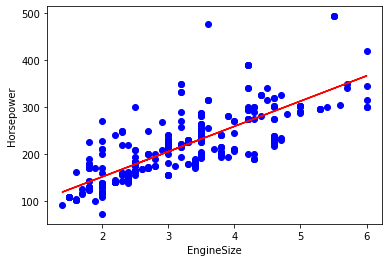

In [113]:
plt.scatter(train_df.EngineSize,train_df.Horsepower, color='blue')
plt.plot(train_x,(train_x*regr.coef_[0][0]+regr.intercept_[0]),'-r')

plt.xlabel('EngineSize')
plt.ylabel('Horsepower');

### Evaluation

In [114]:
test_x=test_df[['EngineSize']]
test_y=test_df[['Horsepower']]
test_y_P=regr.predict(test_x)

In [115]:
from sklearn.metrics import r2_score

In [123]:
print('Mean absolute error: %.2f'    %    np.mean(np.absolute(test_y-test_y_P)))

Mean absolute error: 32.06


In [124]:
print('Residual sum od square error: %.2f' % np.mean((test_y-test_y_P)**2))

Residual sum od square error: 1796.53


In [127]:
print('R2-SCORE: %.2f',r2_score(test_y,test_y_P))

R2-SCORE: %.2f 0.6590760779259416


# Multiple regression

In [128]:
train_df.head(2)

,EngineSize,Cylinders,Horsepower
0,3.5,6.0,265.0
1,2.0,4.0,200.0


In [130]:
x=np.asanyarray(train_df[['EngineSize','Cylinders']])
y=np.asanyarray(train_df[['Horsepower']])

In [133]:
regr. fit(x,y)
# The coefficient
print('Coefficient:',regr.coef_)
print('Intercept',regr.intercept_)

Coefficient: [[21.99611051 24.00477799]]
Intercept [6.84322274]


In [136]:
y_hat=regr.predict(test_df[['EngineSize','Cylinders']])
x=np.asanyarray(test_df[['EngineSize','Cylinders']])
y=np.asanyarray(test_df[['Horsepower']])

In [139]:
#print('Sum of square error {:.2f}'.format(np.mean((y_hat-y)**2)))

Sum of square error 1580.24


In [142]:
print('Sum of square error %.2f' % np.mean((y_hat-y)**2))
print('Variance score %.2f' % regr.score(x,y))
print('R2-SCORE: %.2f',r2_score(y,y_hat))

Sum of square error 1580.24
Variance score 0.70
R2-SCORE: %.2f 0.7001213810003616
